Stock Market Analysis + Prediction using LSTM

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, you will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). you will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. you will look at a few ways of analyzing the risk of a stock, based on its previous performance history. you will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

you'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks'?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE or whatever you like inc using LSTM)

Getting the Data
The first step is to get the data and load it to memory. You will get the stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, you will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance:https://aroussi.com/post/python-yahoo-finance
You are free to use any other source if you want.

1. What was the change in price of the stock overtime?
In this section you'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.
Please run the cell Below

Remeber to run the cells that are coded already. You need to write or fill codes where you are supposed to . For some cells you are given the sample output. Dont run those cells or otherwise you will loose the hints.

In [2]:
# 1. Import the necessary libraries: pandas, numpy, matplotlib.pyplot, seaborn, yfinance, and datetime.
# Install them if already not
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# 2. Define a list of tech stocks (e.g., ['AAPL', 'GOOG', 'MSFT', 'AMZN']).
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# 3. Set up the end and start times for data retrieval. End time should be the current date, and start time should be one year ago from the end date.
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# 4. Use a for loop to download historical stock data for each company in the tech stock list.
for stock in tech_list:
    # a. Inside the loop, use yf.download() to fetch historical stock data for the current 'stock' in the loop.
    # b. Assign the result to a variable (e.g., stock_data).
    # c. Specify the start and end dates using the 'start' and 'end' variables.
    # d. Use globals() to dynamically create variables for each stock (e.g., AAPL, GOOG) and store the fetched data.
    globals()[stock] = yf.download(stock, start, end)

# 5. Create a list of company DataFrames (e.g., company_list) and a corresponding list of company names (e.g., ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']).
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# 6. Use a for loop to assign the company name to each stock's DataFrame.
for company, com_name in zip(company_list, company_name):
    # a. Iterate through company_list and company_name simultaneously using zip.
    # b. For each iteration, add a new column 'company_name' to the 'company' DataFrame and set its value to 'com_name'.
    company["company_name"] = com_name

# 7. Concatenate the DataFrames in company_list along the axis 0 (rows) and store the result in a variable (e.g., df).
df = pd.concat(company_list, axis=0)

# 8. Display the last 10 rows of the concatenated DataFrame.
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-05  144.690002  146.589996  144.529999  145.240005  145.240005   
2024-01-08  146.740005  149.399994  146.149994  149.100006  149.100006   
2024-01-09  148.330002  151.710007  148.210007  151.369995  151.369995   
2024-01-10  152.059998  154.419998  151.880005  153.729996  153.729996   
2024-01-11  155.039993  157.169998  153.119995  155.179993  155.179993   
2024-01-12  155.389999  156.199997  154.009995  154.619995  154.619995   
2024-01-16  153.529999  154.990005  152.149994  153.160004  153.160004   
2024-01-17  151.490005  152.149994  149.910004  151.710007  151.710007   
2024-01-18  152.770004  153.779999  151.820007  153.500000  153.500000   
2024-01-19  153.830002  155.759995  152.740005  155.339996  155.339996   

              Volume company_name  
Date                               
2024-01-05  45124800       AMAZON  
2024-01-08  46757100       AMAZON  
2024-01-09  43812600       AMAZON  
2024-01-10  44421800       AMAZON  
2024-01-11  49072700       AMAZON  
2024-01-12  40460300       AMAZON  
2024-01-16  41384600       AMAZON  
2024-01-17  34953400       AMAZON  
2024-01-18  37850200       AMAZON  
2024-01-19  51033700       AMAZON

Descriptive Statistics about the Data
.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Run the cells below for more detail.

In [3]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   174.850837  176.440797  173.598725  175.179682  174.788376   
std     15.024444   14.762392   14.963640   14.777304   14.951211   
min    135.279999  138.020004  134.220001  137.869995  137.103653   
25%    165.139999  166.644997  164.400002  165.709999  165.040512   
50%    176.960007  178.990005  175.820007  177.300003  176.996811   
75%    187.424995  188.645004  185.750000  187.759995  187.499641   
max    198.020004  199.619995  197.000000  198.110001  198.110001   

             Volume  
count  2.510000e+02  
mean   5.849635e+07  
std    1.734696e+07  
min    2.404830e+07  
25%    4.751440e+07  
50%    5.468690e+07  
75%    6.546495e+07  
max    1.543573e+08

Look we have only 255 records in one year because weekends are not included in the data.

Information About the Data
.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-20 to 2024-01-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.
Code the blank places

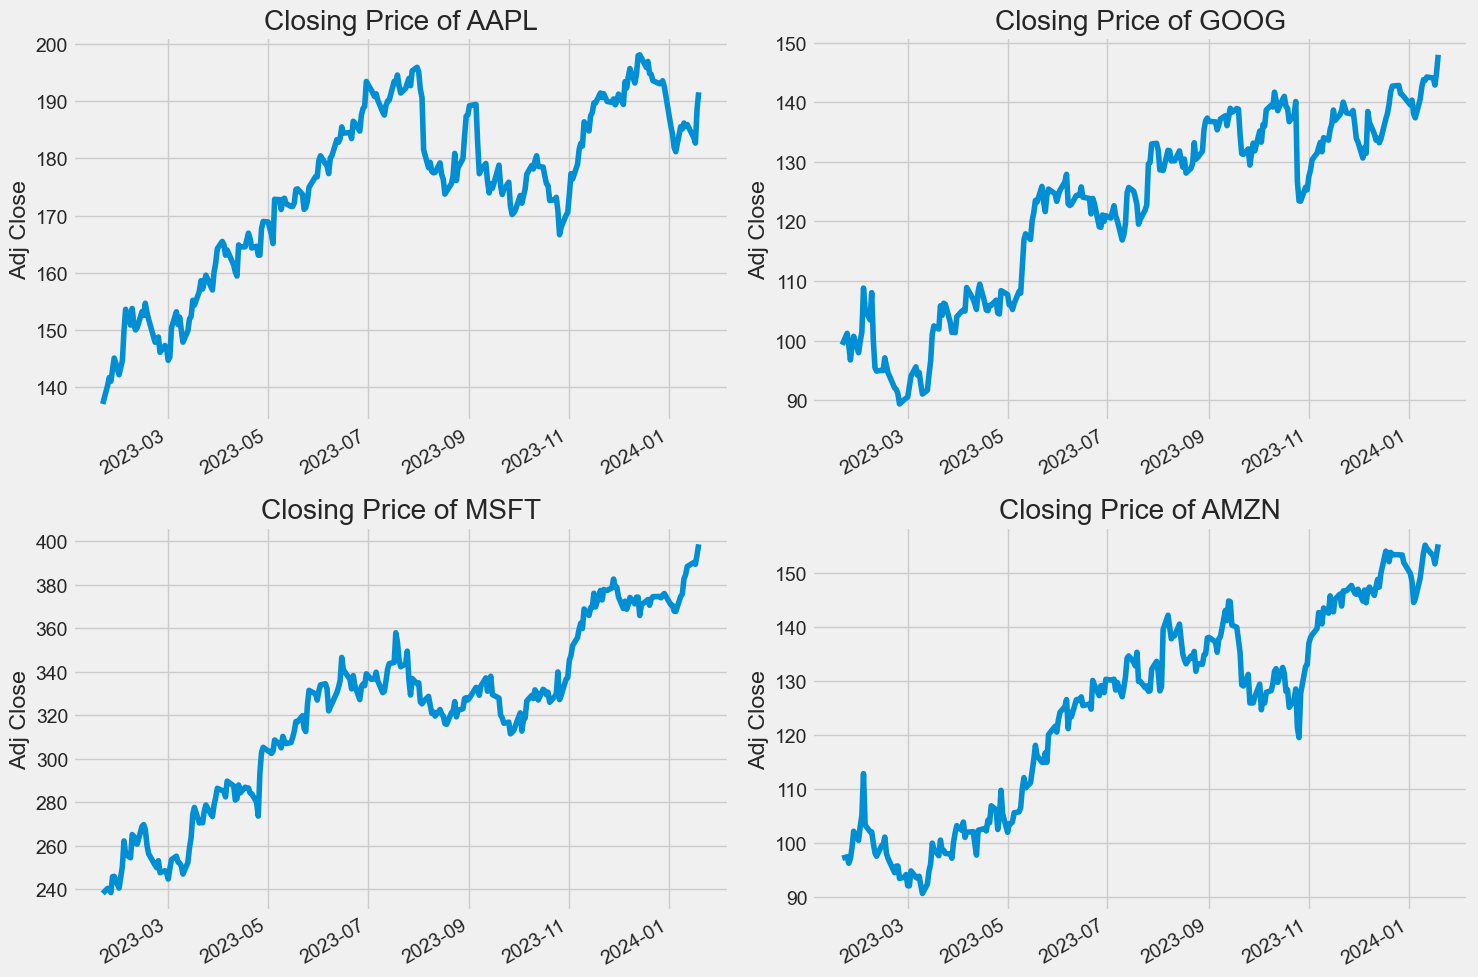

In [5]:
# 1. Create a figure with a size of (15, 10).
plt.figure(figsize=(15, 10))

# 2. Adjust subplot parameters to provide extra space at the top.
plt.subplots_adjust(top=1.25, bottom=1.2)

# 3. Iterate over the company_list:
#    a. Create subplots in a 2x2 grid.
#    b. Plot the 'Adj Close' column of the current company's DataFrame.
#    c. Set y-axis label to 'Adj Close'.
#    d. Remove x-axis label.
#    e. Set subplot title dynamically based on the tech stock.
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

# 4. Adjust layout for better visualization.
plt.tight_layout()

# 5. Display the plot.
plt.show()


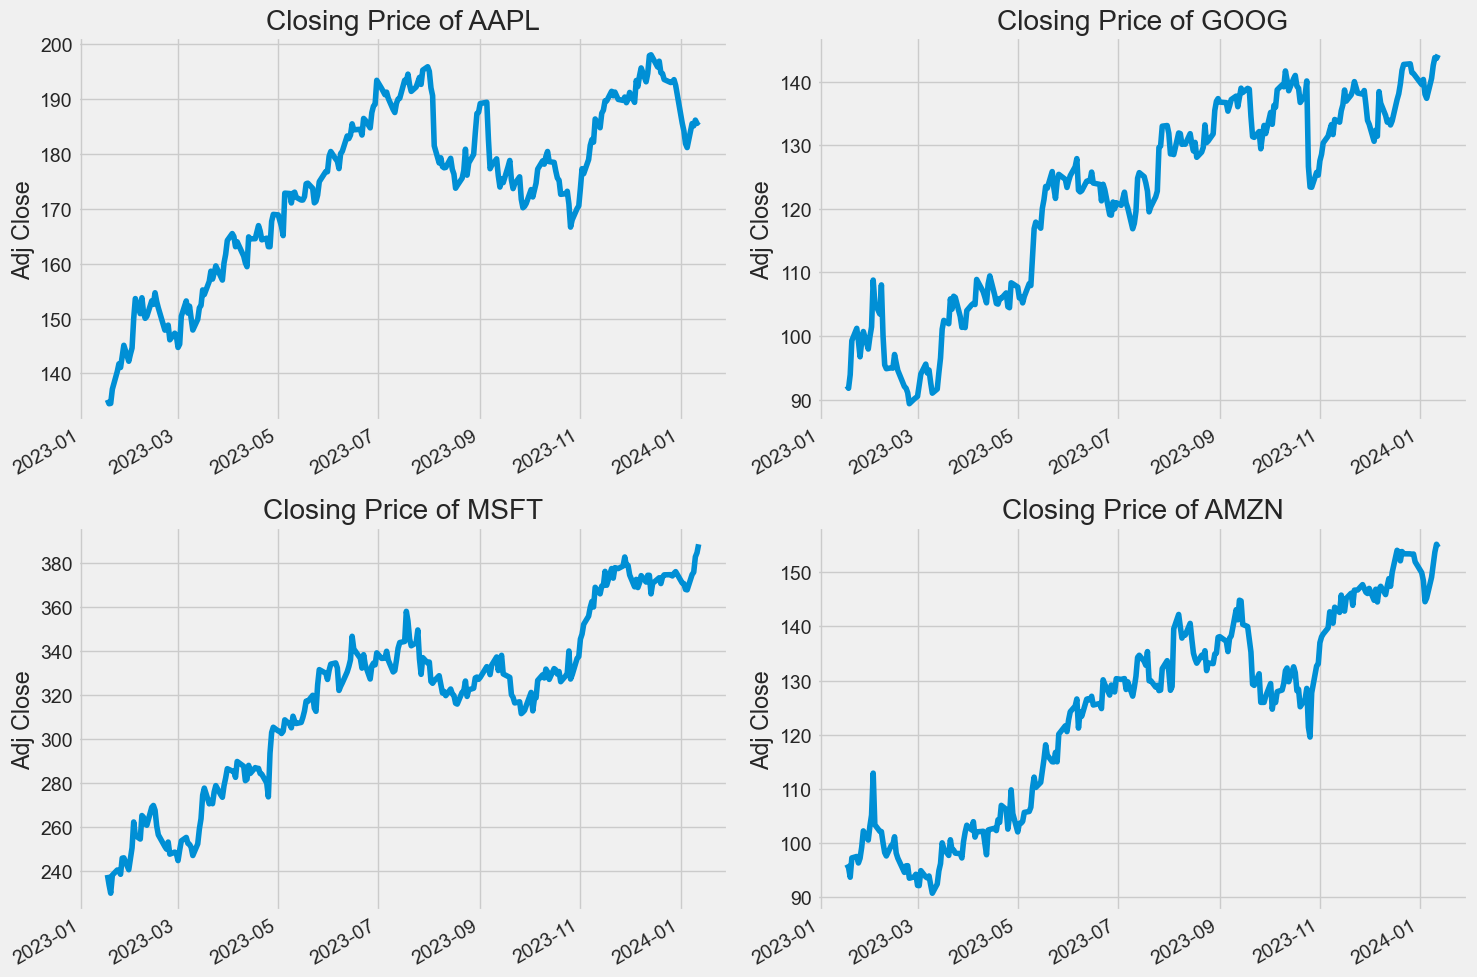

In [7]:
# dont do anything the output of the previous cell will be like the cell below

Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

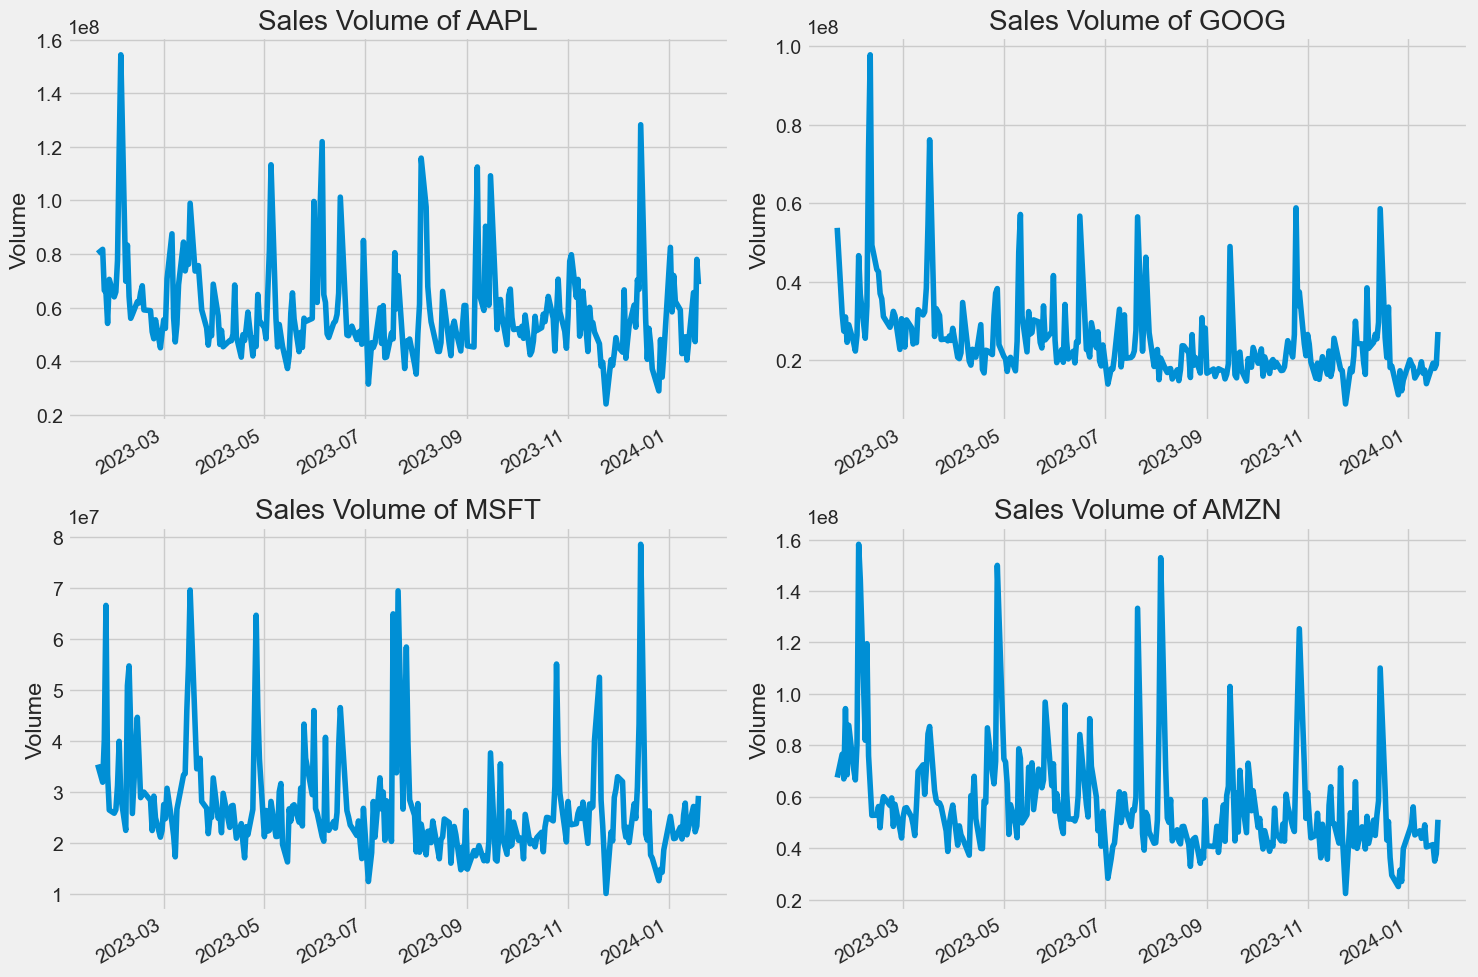

In [7]:
# do the same plotting for Volume as done for Adj Close
#code here#
# 1. Create a figure with a size of (15, 10).
plt.figure(figsize=(15, 10))

# 2. Adjust subplot parameters to provide extra space at the top.
plt.subplots_adjust(top=1.25, bottom=1.2)

# 3. Iterate over the company_list:
#    a. Create subplots in a 2x2 grid.
#    b. Plot the 'Volume' column of the current company's DataFrame.
#    c. Set y-axis label to 'Volume'.
#    d. Remove x-axis label.
#    e. Set subplot title dynamically based on the tech stock.
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {tech_list[i - 1]}")

# 4. Adjust layout for better visualization.
plt.tight_layout()

# 5. Display the plot.
plt.show()


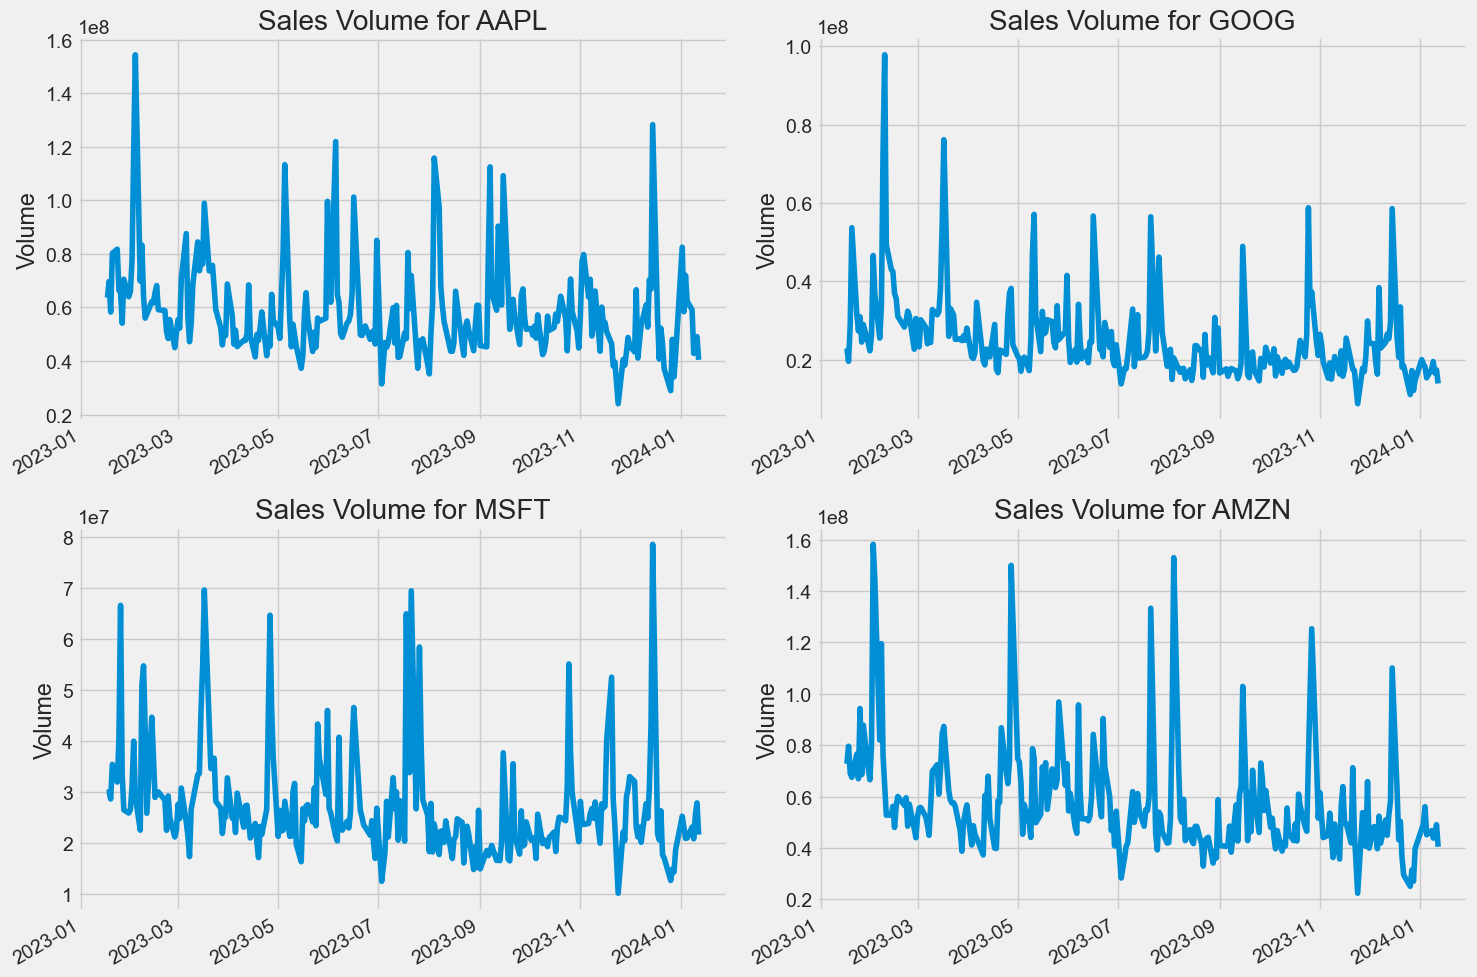

In [8]:
#sample output

2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

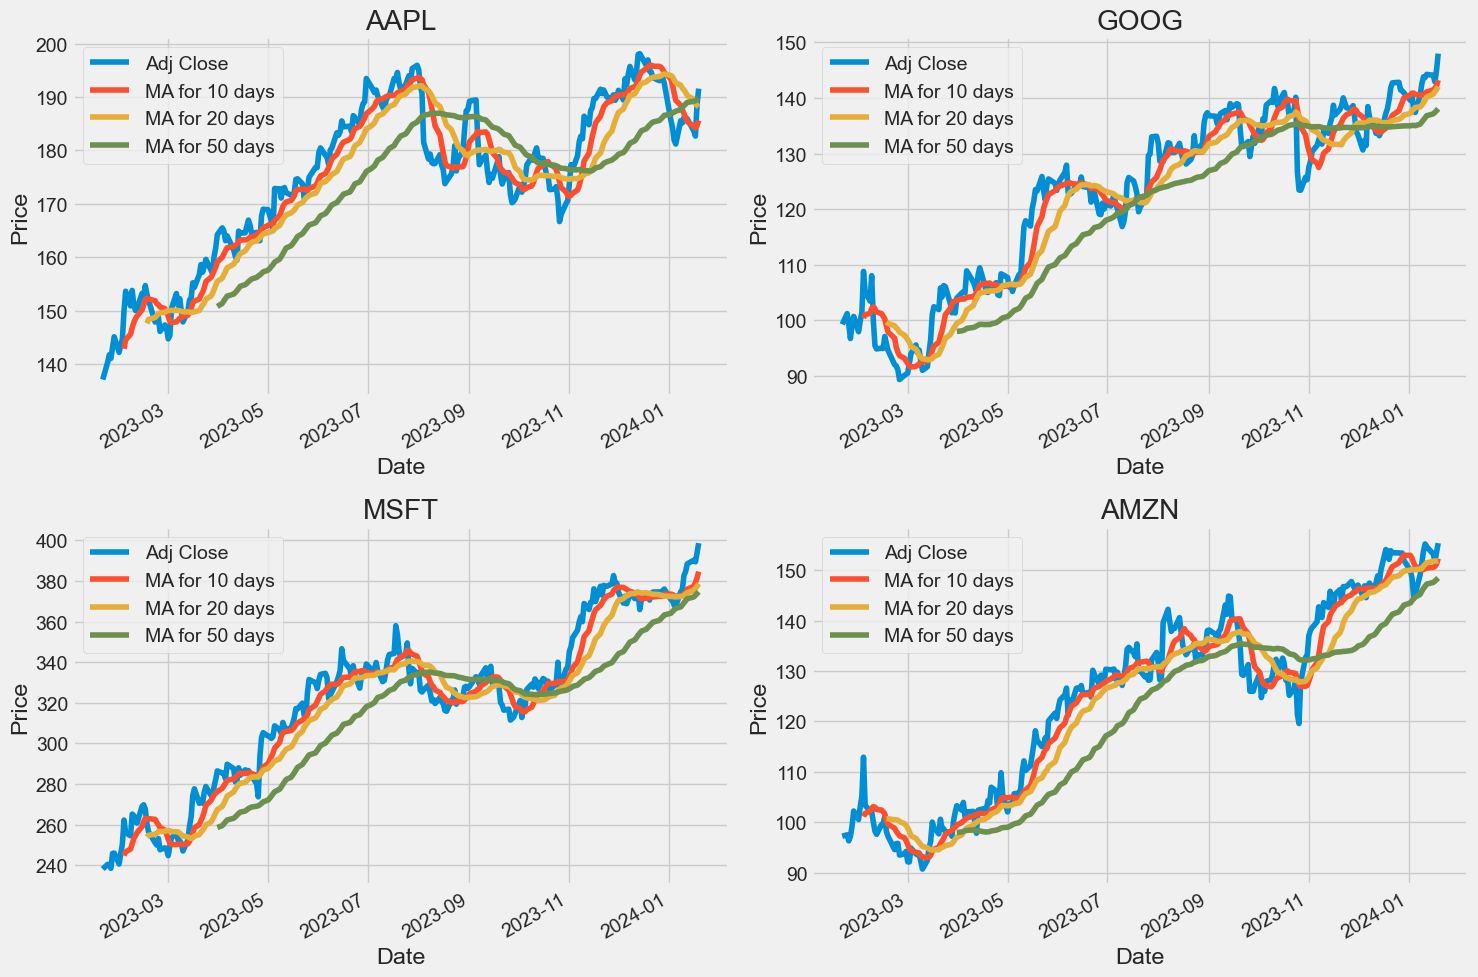

In [9]:
ma_days = [10, 20, 50]

# Calculate moving averages for each specified ma_day and each company
for ma_day in ma_days:
    for company in company_list:
        # Calculate moving average and create a new column
        company[f'MA for {ma_day} days'] = company['Adj Close'].rolling(window=ma_day).mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

company_dict = {'AAPL': AAPL, 'GOOG': GOOG, 'MSFT': MSFT, 'AMZN': AMZN}

for (company_symbol, company), ax in zip(company_dict.items(), axes.flatten()):
    company[['Adj Close'] + [f'MA for {ma_day} days' for ma_day in ma_days]].plot(ax=ax)
    ax.set_title(company_symbol)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()

fig.tight_layout()
plt.show()


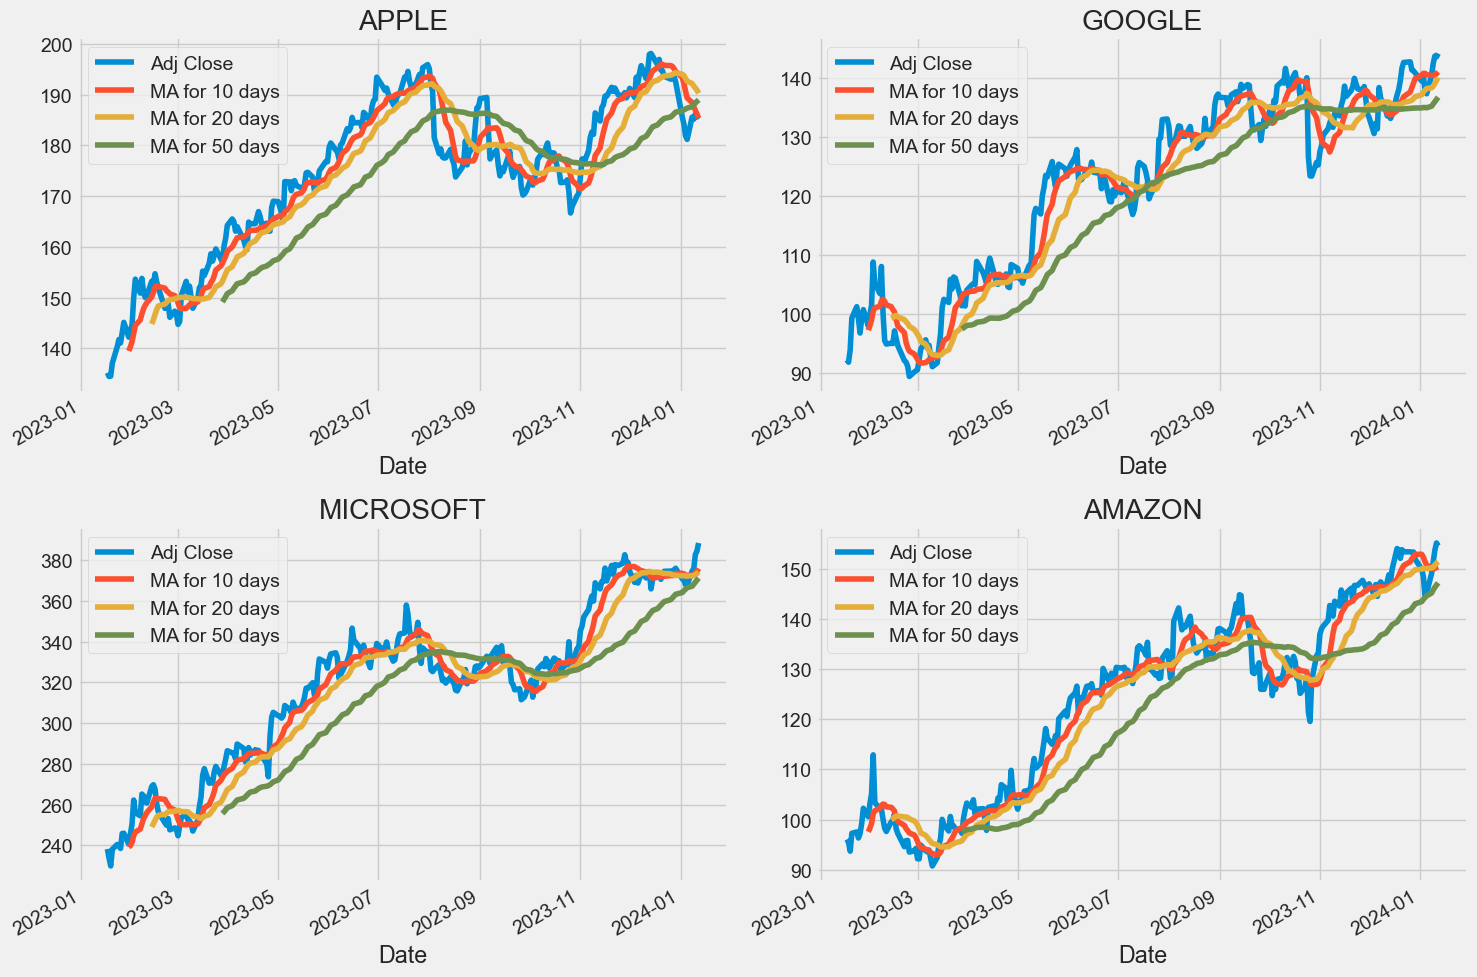

In [9]:
#sample output

3. What was the daily return of the stock on average?
Now that you've done some baseline analysis, let's go ahead and dive a little deeper. You're now going to analyze the risk of the stock. In order to do so You'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

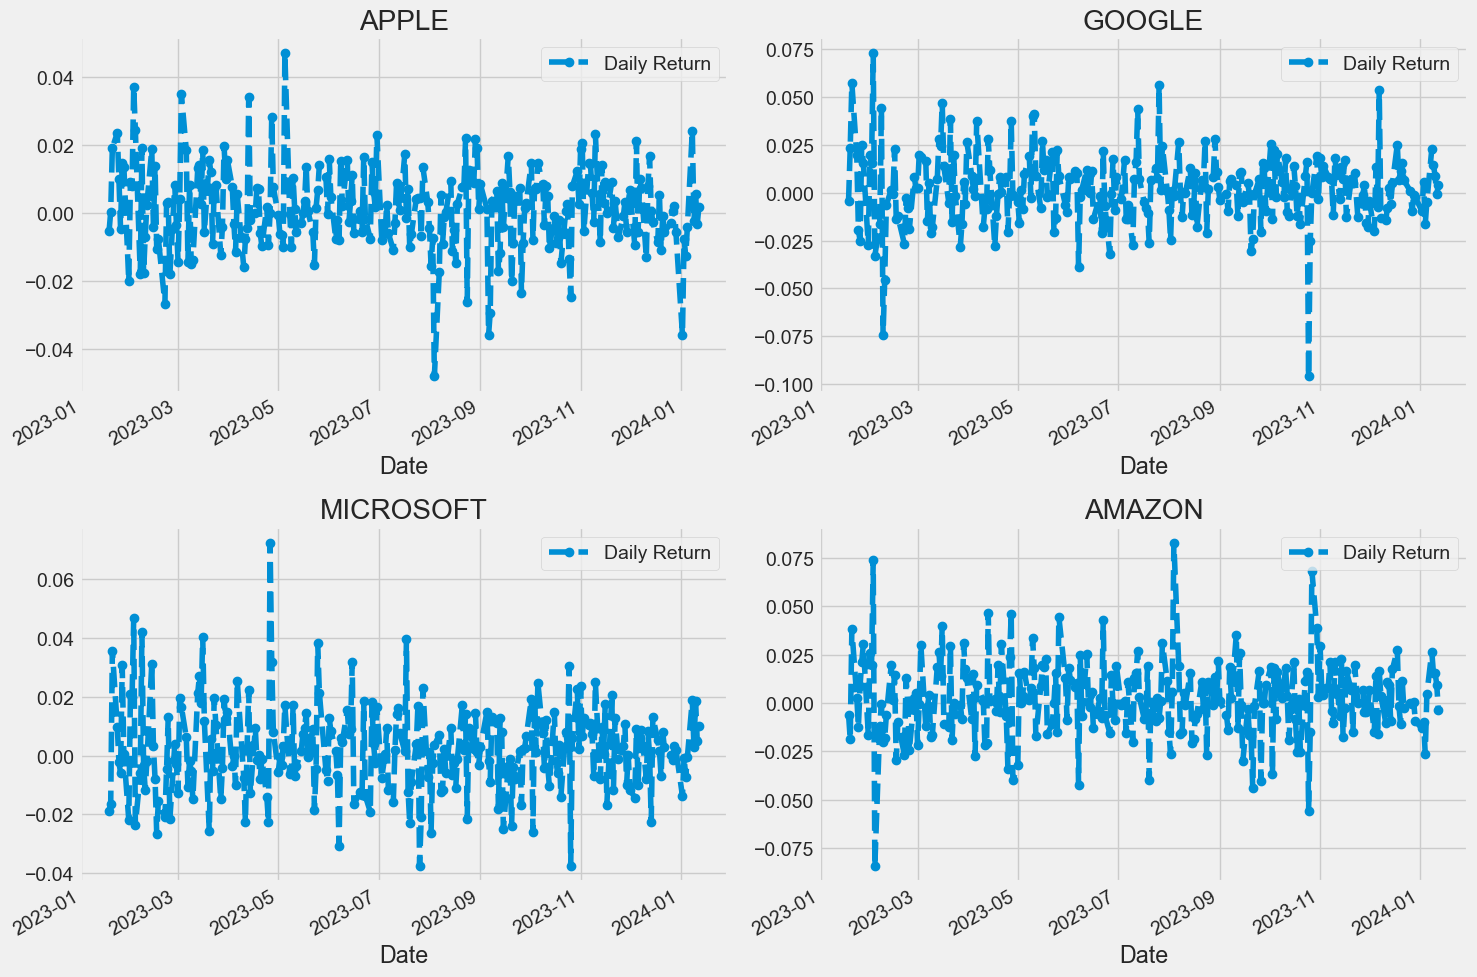

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. You'll use seaborn to create both a histogram and kde plot on the same figure.

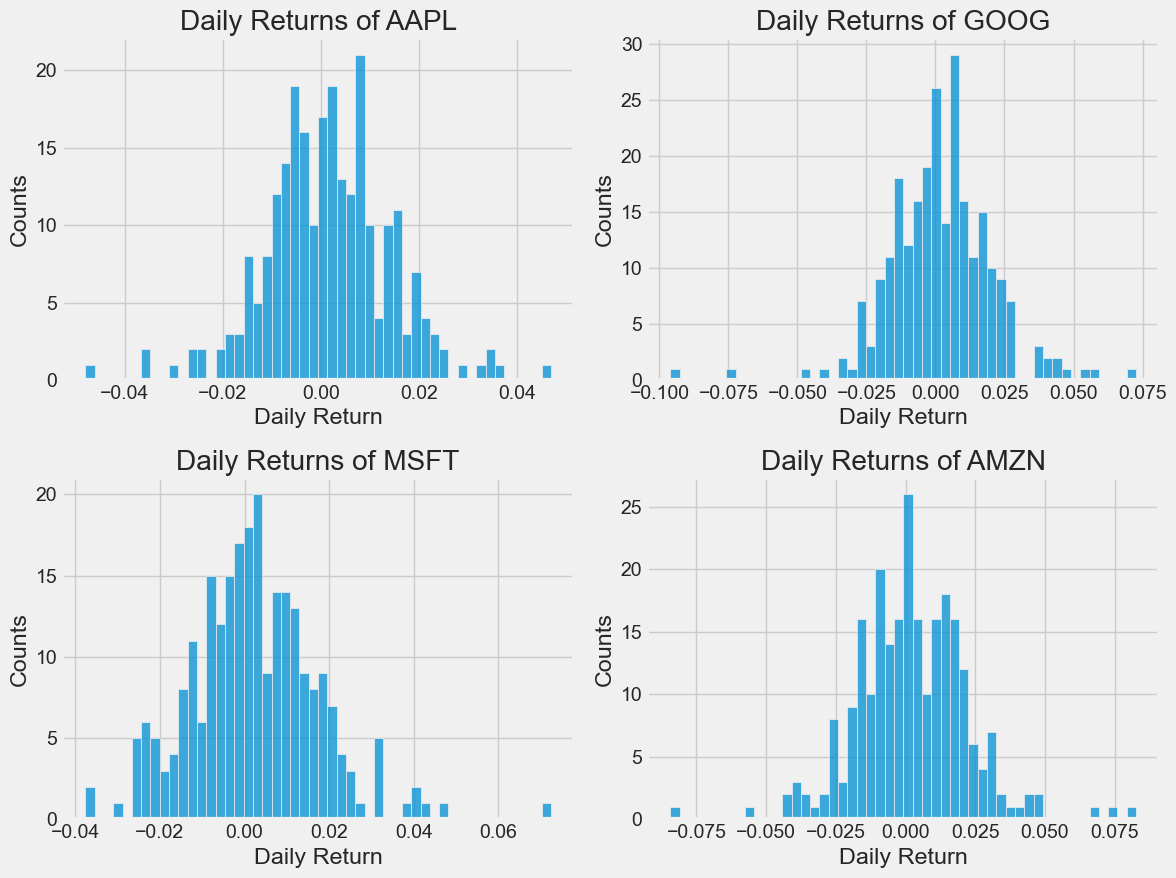

In [12]:
# Calculate Daily Returns
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting
plt.figure(figsize=(12, 9))

# Use a for loop to iterate over the company_list:
for i, company in enumerate(company_list, 1):
    # Create subplots in a 2x2 grid.
    plt.subplot(2, 2, i)
    
    # Plot the histogram of daily returns for the current company
    sns.histplot(company['Daily Return'].dropna(), bins=50, kde=False)  # Drop NaN values
    
    # Set the x-axis label to 'Daily Return'
    plt.xlabel('Daily Return')
    
    # Set the y-axis label to 'Counts'
    plt.ylabel('Counts')
    
    # Set the title of the subplot to the company name dynamically
    plt.title(f"Daily Returns of {tech_list[i - 1]}")

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


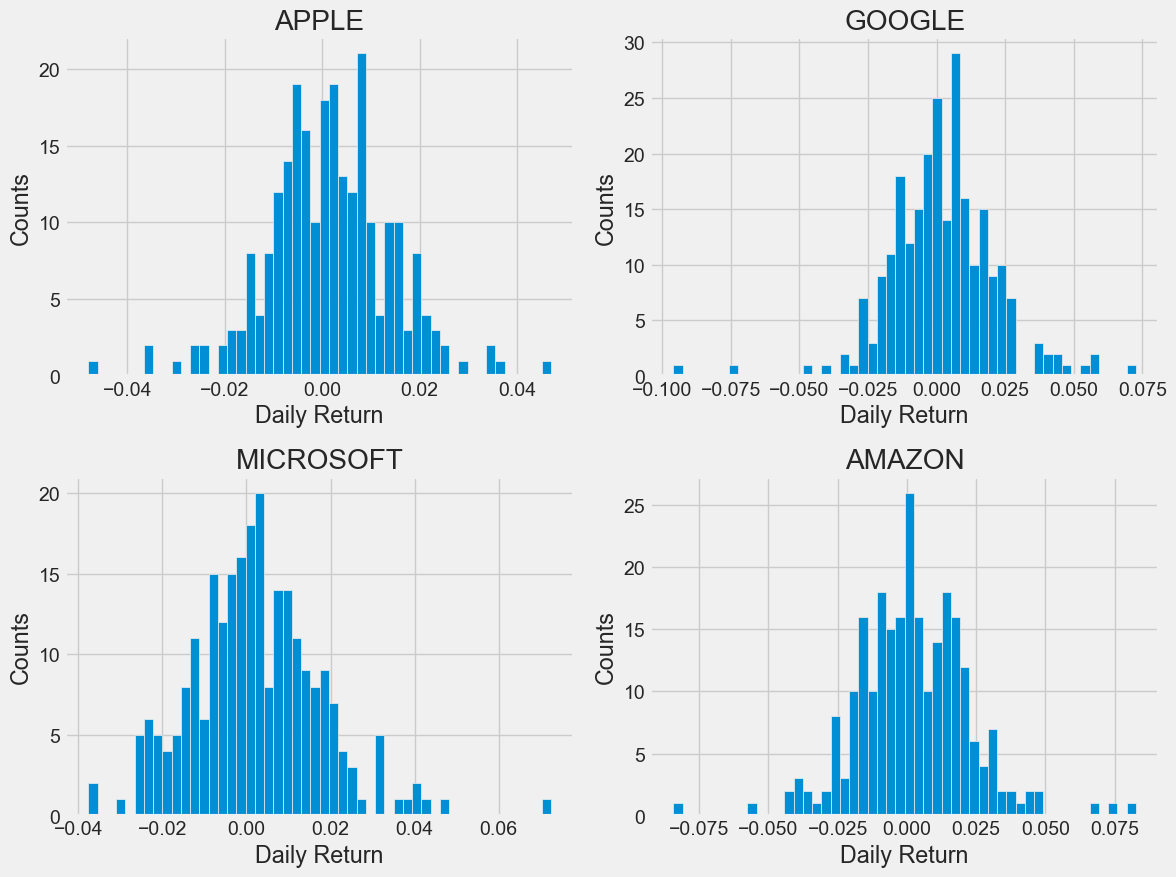

In [11]:
# Sample output

4. What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-17       NaN       NaN       NaN       NaN
2023-01-18 -0.005370 -0.006143 -0.004123 -0.018889
2023-01-19  0.000444 -0.018647  0.023208 -0.016454
2023-01-20  0.019221  0.038108  0.057182  0.035744
2023-01-23  0.023501  0.002776  0.019440  0.009824

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

[*********************100%%**********************]  4 of 4 completed


<Figure size 800x800 with 0 Axes>

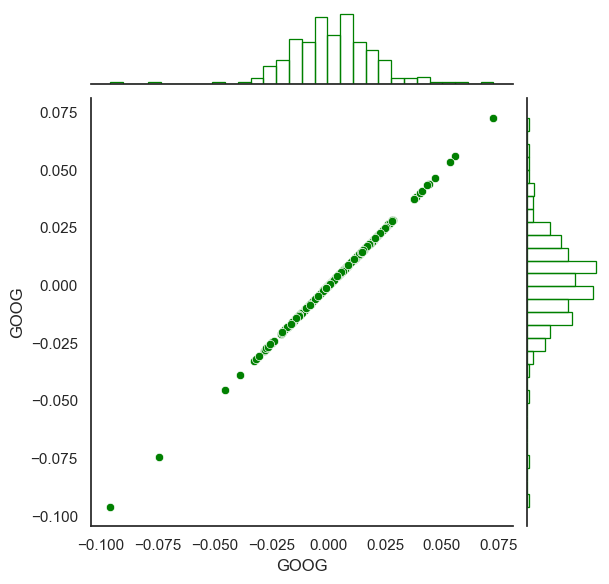

In [29]:
# Compare Google to itself should show a perfectly linear relationship
#Code here 
# Assuming tech_rets is the DataFrame containing daily percentage returns
plt.figure(figsize=(8, 8))
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()


sns.set(style="white", palette="muted", color_codes=True)

# Create a jointplot
g = sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind="scatter", marginal_kws=dict(bins=30, fill=False), color= 'green')

# Set labels and title
g.set_axis_labels("GOOG", "GOOG", fontsize=12)

# Show the plot
plt.show()




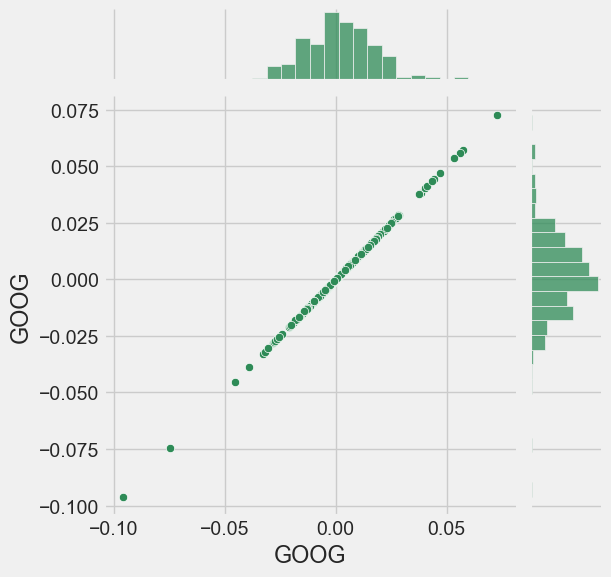

In [13]:
#Sample output here

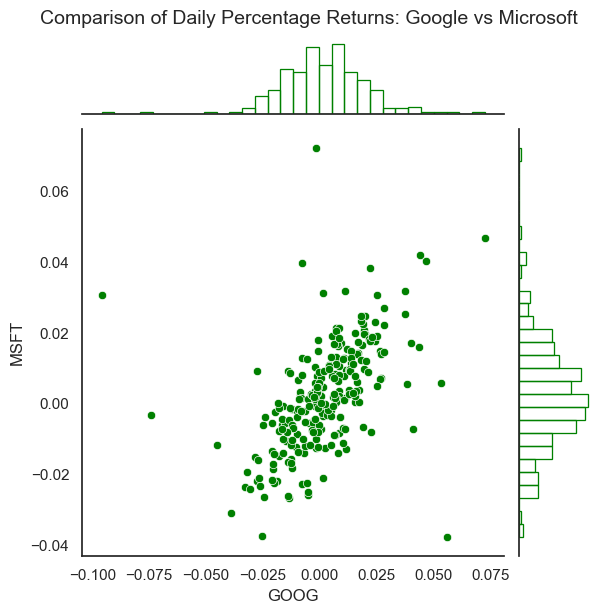

In [33]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
# Code here
sns.set(style="white", palette="muted", color_codes=True)

# Create a jointplot
g = sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind="scatter", marginal_kws=dict(bins=30, fill=False),color='green')

# Set labels and title
g.set_axis_labels("GOOG", "MSFT", fontsize=12)
g.fig.suptitle("Comparison of Daily Percentage Returns: Google vs Microsoft", y=1.02, fontsize=14)

# Show the plot
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


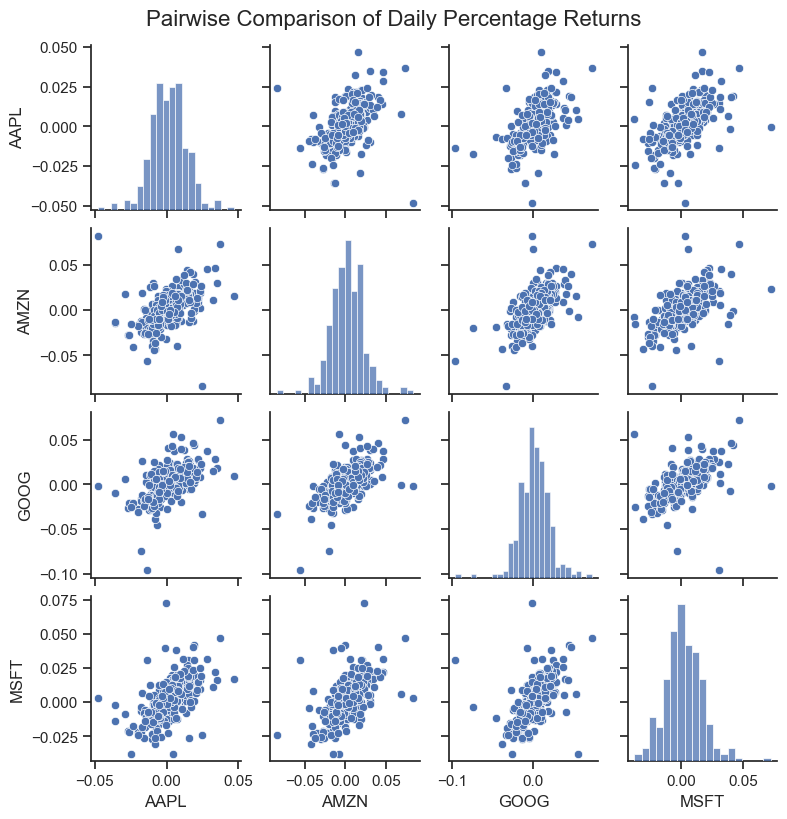

In [34]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

# Code here
sns.set(style="ticks", color_codes=True)

# Create a pairplot
g = sns.pairplot(tech_rets, height=2)



# Show the plot
plt.show()

C:\Users\AMIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


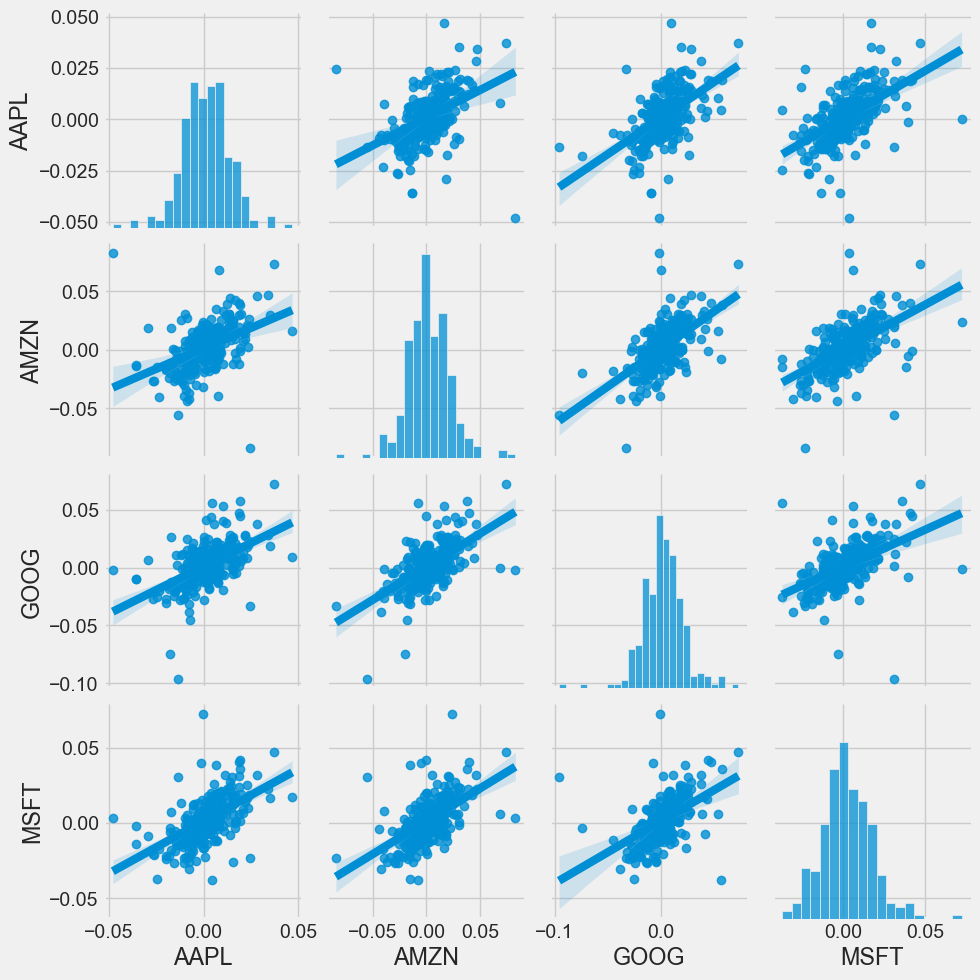

In [14]:
# Sample output here

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

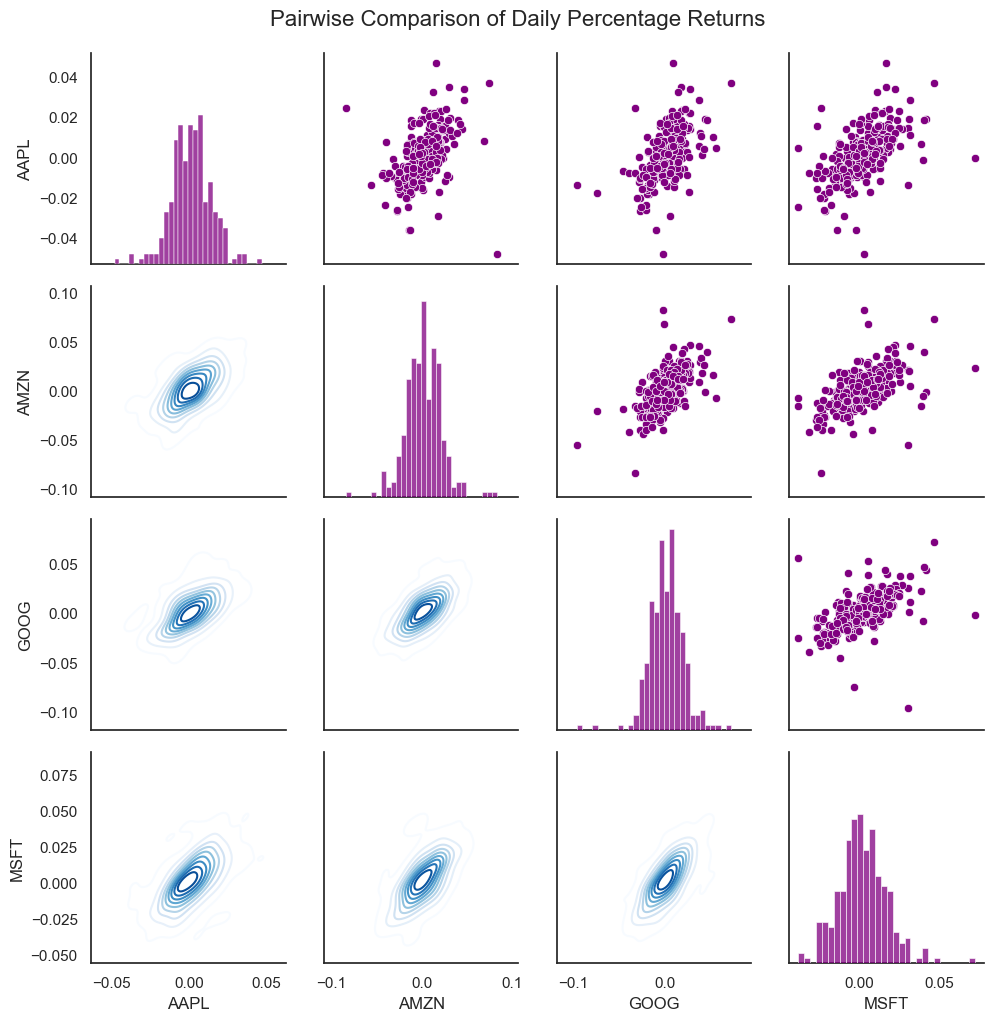

In [35]:
sns.set(style="white")

# Set up the figure
returns_fig = sns.PairGrid(tech_rets)

# Using map_upper to specify the upper triangle
returns_fig.map_upper(sns.scatterplot, color='purple')

# Using map_lower to specify the lower triangle, including plot type (kde) and color map (Blues)
returns_fig.map_lower(sns.kdeplot, cmap='Blues')

# Finally, define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(sns.histplot, bins=30, color='purple')


# Show the plot
plt.show()


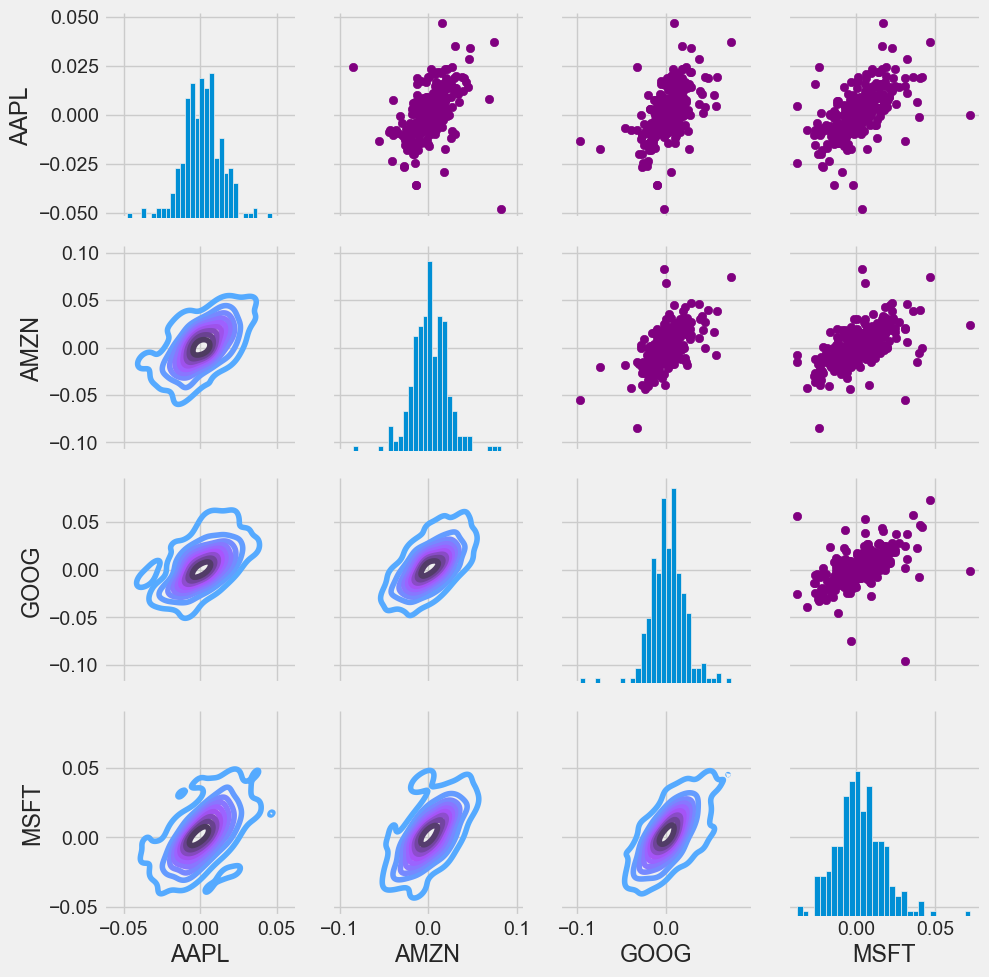

In [15]:
# Sample here

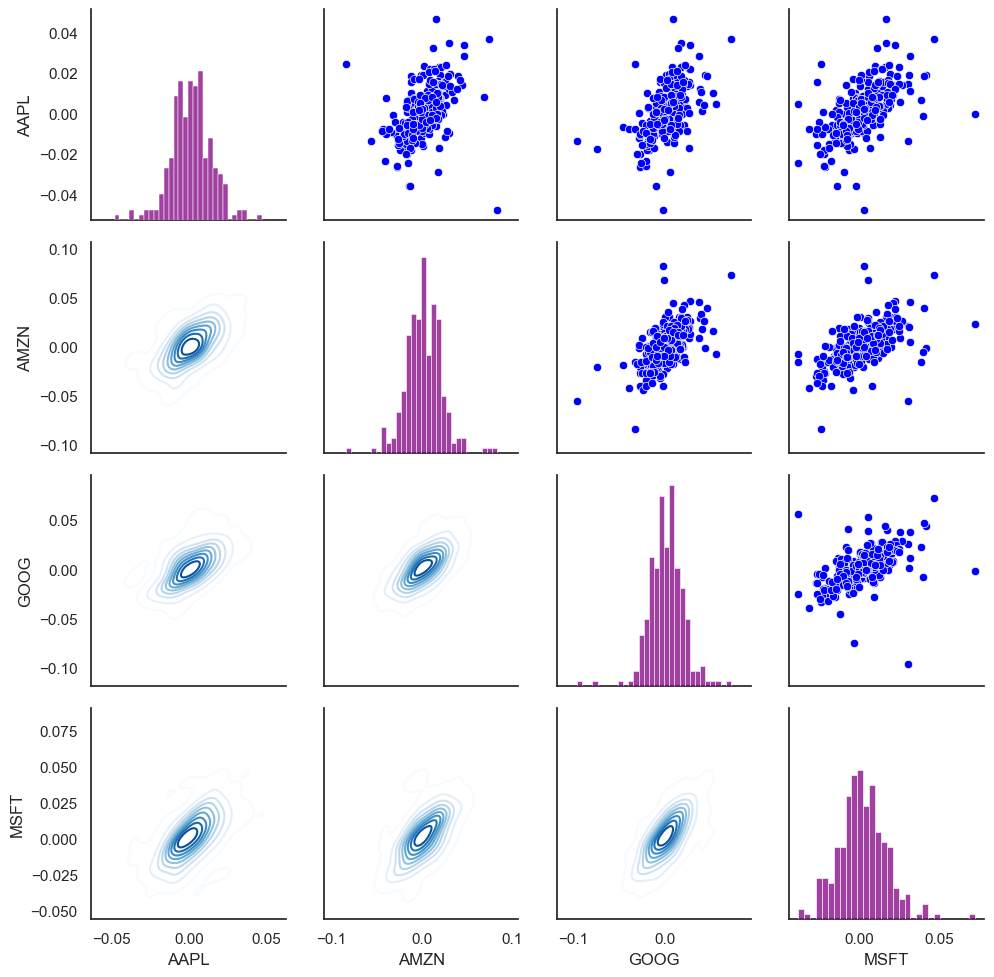

In [37]:

sns.set(style="white")

# Set up the figure
returns_fig = sns.PairGrid(tech_rets)

# Using map_upper to specify the upper triangle (scatter plot)
returns_fig.map_upper(sns.scatterplot, color='blue')

# Using map_lower to specify the lower triangle (kde plot) with a color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='Blues')

# Finally, define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(sns.histplot, bins=30, color='purple')


# Show the plot
plt.show()



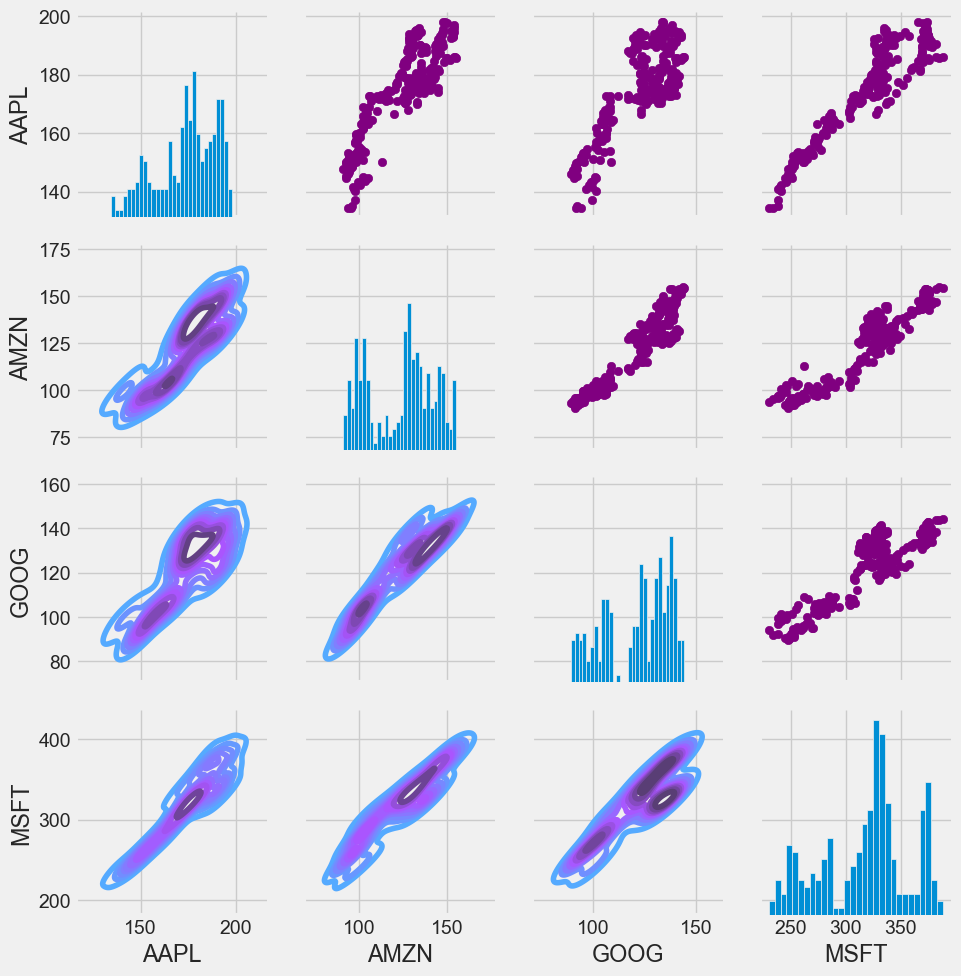

In [16]:
# sample here 

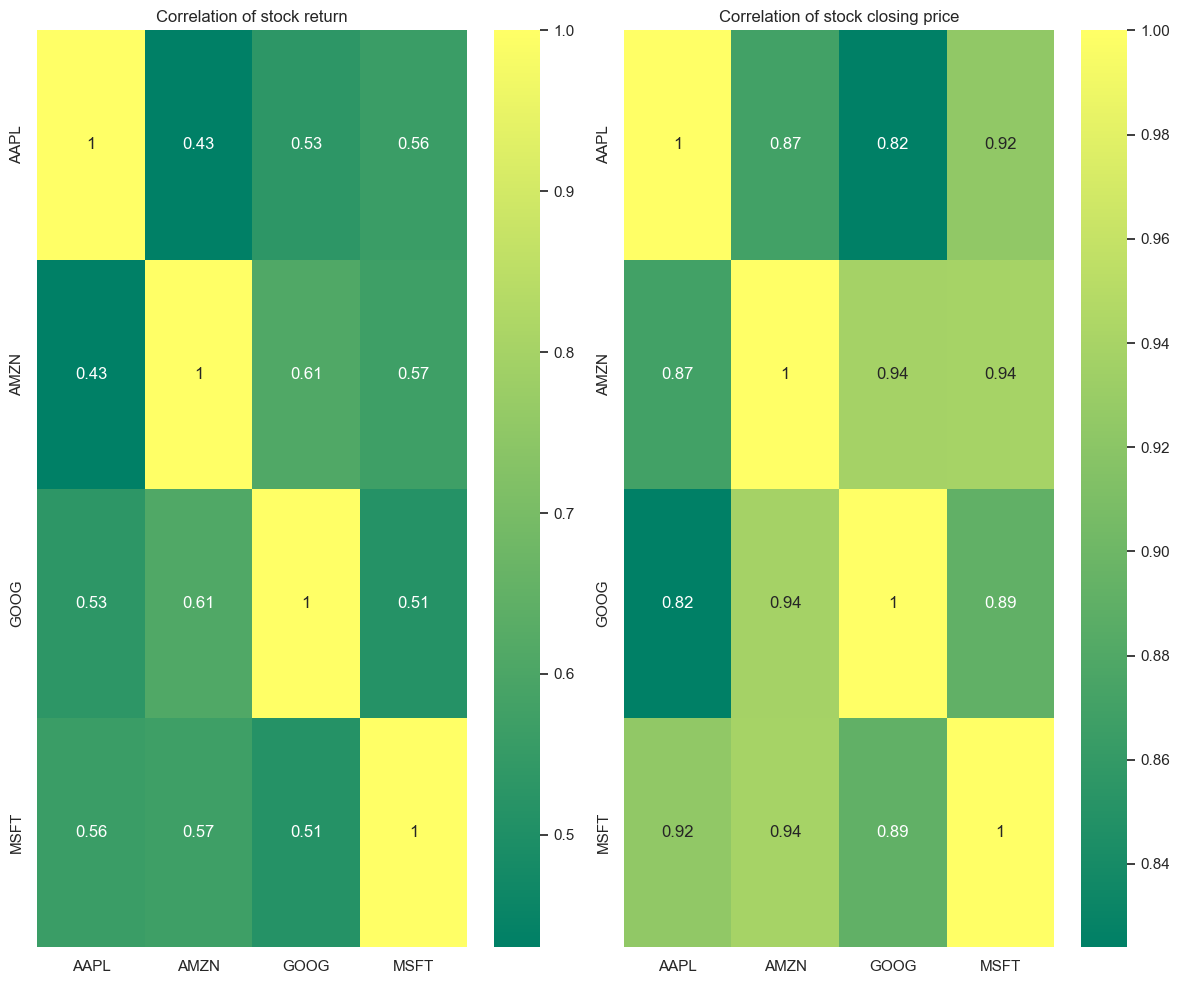

In [38]:
# 1. Create a figure with a size of (12, 10)
fig, axes = plt.subplots(figsize=(12, 10), ncols=2)

# For the first subplot:
# 3. Create a heatmap of the correlation matrix for daily stock returns using sns.heatmap().
#    a. Set the data to tech_rets.corr().
#    b. Enable annotations with annot=True.
#    c. Use the 'summer' colormap for better visualization.
# 4. Set the title of the subplot to 'Correlation of stock return'.
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', ax=axes[0])
axes[0].set_title('Correlation of stock return')

# For the second subplot:
# 5. Create a heatmap of the correlation matrix for stock closing prices using sns.heatmap().
#    a. Set the data to closing_df.corr().
#    b. Enable annotations with annot=True.
#    c. Use the 'summer' colormap for better visualization.
# 6. Set the title of the subplot to 'Correlation of stock closing price'.
sns.heatmap(closing_df.corr(), annot=True, cmap='summer', ax=axes[1])
axes[1].set_title('Correlation of stock closing price')

# 7. Adjust the layout for better visualization.
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Correlation of stock closing price')

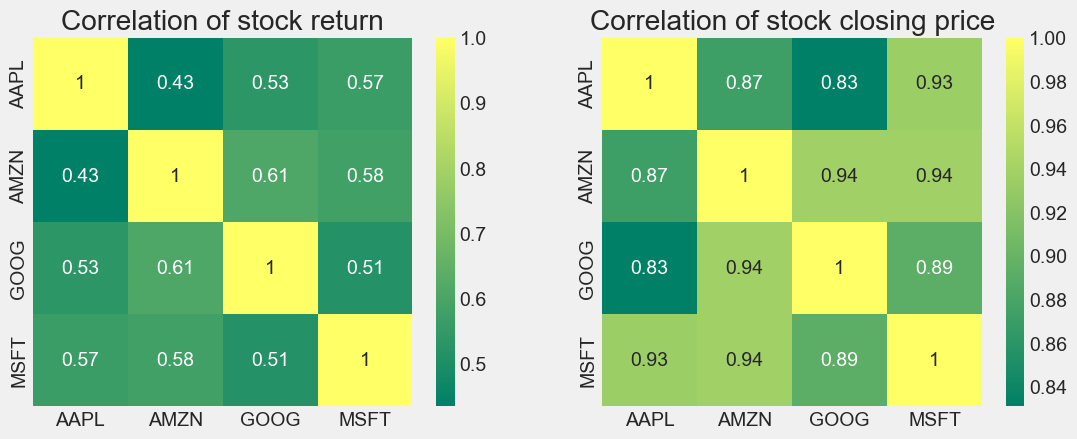

In [17]:
# Sample here

5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

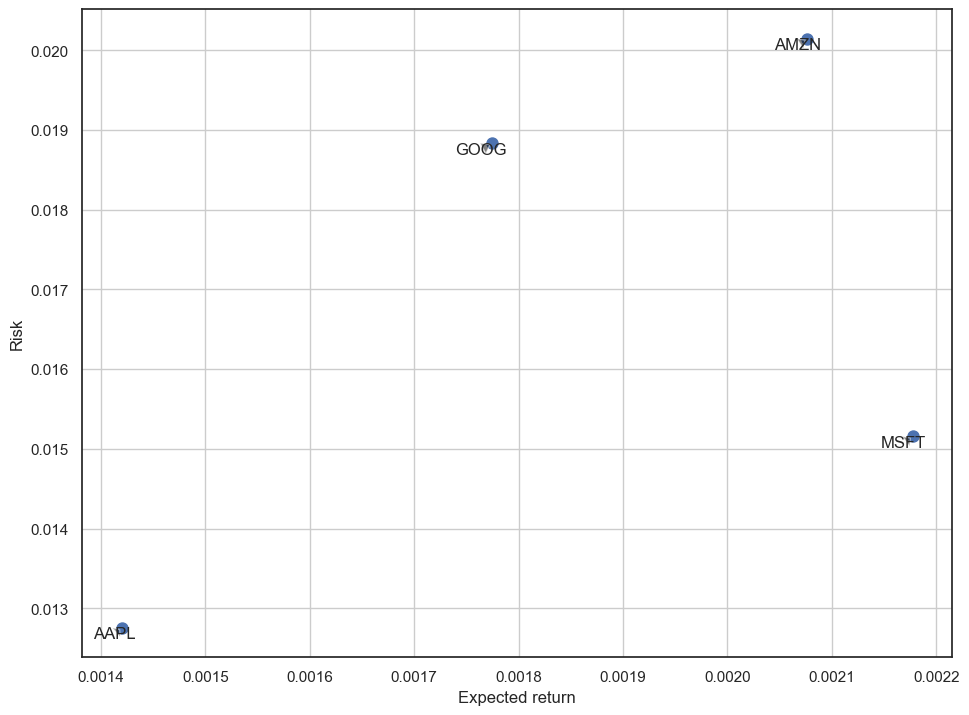

In [40]:
# 1. Drop any NaN values from the tech_rets DataFrame and store the result in rets.
rets = tech_rets.dropna()

# 2. Calculate the area for the scatter plot using the formula: area = np.pi * 20.
area = np.pi * 20

# 3. Create a figure with a size of (10, 8).
plt.figure(figsize=(10, 8))

# 4. Use plt.scatter() to create a scatter plot.
#    a. Set 'rets.mean()' as the x-axis values and 'rets.std()' as the y-axis values.
#    b. Set the marker size to 'area'.
#    c. Set the edgecolors to 'b' (blue) for better visibility of curves.
plt.scatter(rets.mean(), rets.std(), s=area, edgecolors='b')

# 5. Set the x-axis label to 'Expected return' and the y-axis label to 'Risk'.
plt.xlabel('Expected return')
plt.ylabel('Risk')

# 6. Iterate over the columns of the rets DataFrame using a for loop with zip.
for label, mean, std in zip(rets.columns, rets.mean(), rets.std()):
    #    a. For each iteration, extract the label, mean, and standard deviation using 'rets.columns', 'rets.mean()', and 'rets.std()'.
    #    b. Use plt.annotate() to add labels at the specified coordinates (x, y).
    #    c. Set the label text, position, and style.
    #    d. Customize the annotation by adjusting xytext, textcoords, ha, va, and arrowprops parameters.
    plt.annotate(
        label,
        xy=(mean, std),
        xytext=(10, -10),
        textcoords='offset points',
        ha='right',
        va='bottom',
        arrowprops=dict(arrowstyle='wedge,tail_width=0.7', facecolor='black', alpha=0.5)
    )

# Add grids
plt.grid(True)

# Show the plot
plt.show()



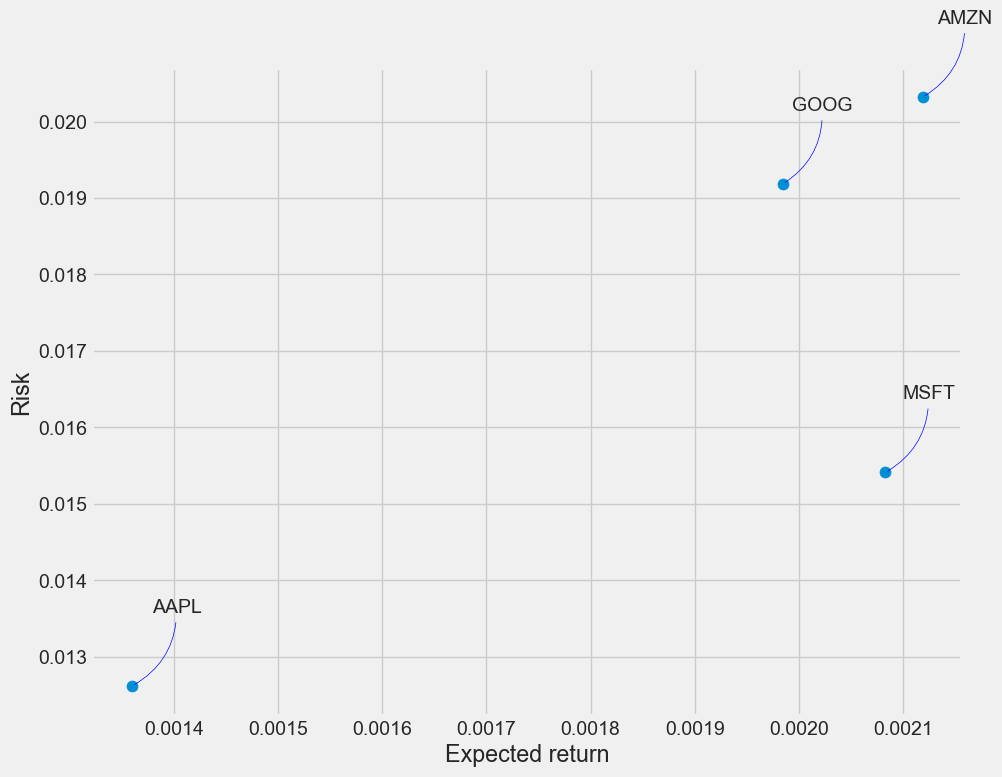

In [18]:
# Sample here 

6. Predicting the closing price stock price of APPLE inc:

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.449692   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.516597   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.655556   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.787857   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.767571   
...                ...         ...         ...         ...         ...   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.559998   
2024-01-09  183.919998  185.149994  182.729996  185.139999  185.139999   
2024-01-10  184.350006  186.399994  183.919998  186.190002  186.190002   
2024-01-11  186.539993  187.050003  183.619995  185.589996  185.589996   
2024-01-12  186.059998  186.740005  185.190002  185.919998  185.919998   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2024-01-08   59144500  
2024-01-09   42841800  
2024-01-10   46792900  
2024-01-11   49128400  
2024-01-12   40444700  

[3027 rows x 6 columns]

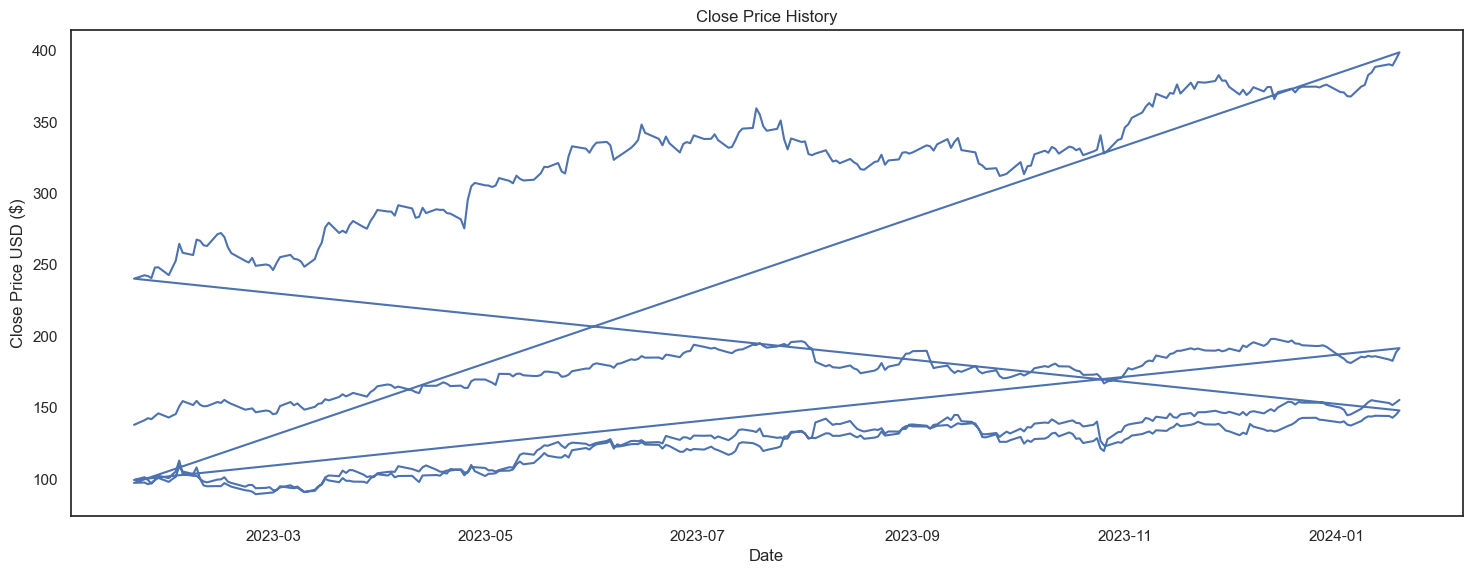

In [41]:

# 1. Create a figure with a size of (16, 6).
plt.figure(figsize=(16, 6))

# 2. Set the title of the plot to 'Close Price History' using plt.title().
plt.title('Close Price History')

# 3. Plot the 'Close' column of the df DataFrame using plt.plot().
plt.plot(df['Close'])

# 4. Set the x-axis label to 'Date' and y-axis label to 'Close Price USD ($)' using plt.xlabel() and plt.ylabel().
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# 5. Display the plot using plt.show().
plt.show()


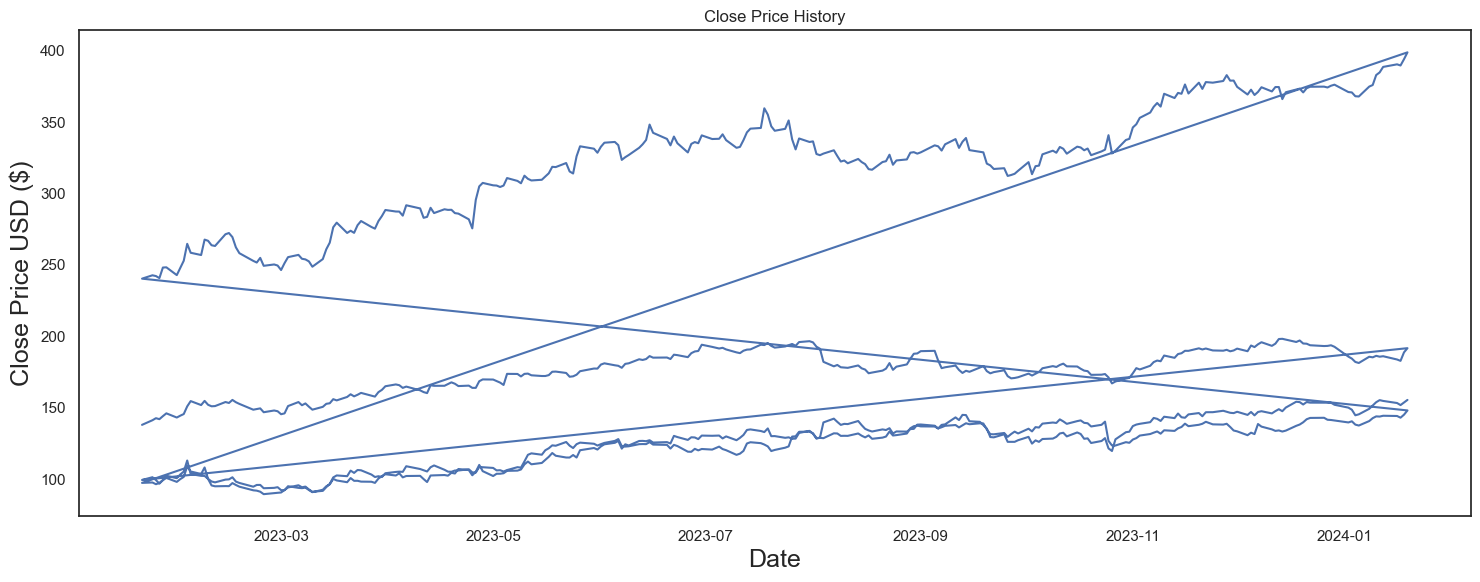

In [42]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [44]:
# Create a new dataframe with only the 'Close' column
data = df[['Close']]

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len

954

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'dataset' is the NumPy array you obtained earlier

# Create an instance of MinMaxScaler with feature_range=(0,1).
scaler = MinMaxScaler(feature_range=(0, 1))

# Use the fit_transform method to scale the 'dataset'.
# Store the scaled data in the variable 'scaled_data'
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.15686019],
       [0.1673348 ],
       [0.17192551],
       ...,
       [0.20160353],
       [0.2073904 ],
       [0.21333892]])

In [ ]:
# Create the training data set. from now you have to do most of the coding . ENJOY

In [47]:

# 1. Create the training data set by extracting the initial part of 'scaled_data' (up to 'training_data_len').
train_data = scaled_data[:training_data_len]

# 2. Split the training data into 'x_train' and 'y_train' data sets.
x_train, y_train = [], []

# a. Iterate over the range from 60 to the length of 'train_data'.
for i in range(60, len(train_data)):
    # b. For each iteration, append the previous 60 data points to 'x_train' and the next data point to 'y_train'.
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    # c. Print 'x_train', 'y_train', and an empty line if i is less than or equal to 61.
    if i <= 61:
        print("x_train:", x_train)
        print("y_train:", y_train)
        print()

# 3. Convert 'x_train' and 'y_train' to numpy arrays.
x_train, y_train = np.array(x_train), np.array(y_train)

# 4. Reshape 'x_train' to have three dimensions: (number of samples, time steps, features) using np.reshape().
#    a. The shape should be (x_train.shape[0], x_train.shape[1], 1).
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train: [array([0.15686019, 0.1673348 , 0.17192551, 0.16975947, 0.17654858,
       0.18291734, 0.17344497, 0.17761539, 0.18130089, 0.19872626,
       0.2106233 , 0.20166816, 0.21110821, 0.20228242, 0.19888786,
       0.19934047, 0.20852193, 0.20642052, 0.21330661, 0.20806933,
       0.20431916, 0.19116124, 0.19255141, 0.1941355 , 0.18543905,
       0.18935082, 0.18770206, 0.18091296, 0.18285272, 0.19940514,
       0.20845726, 0.20124791, 0.20535366, 0.19798266, 0.19122591,
       0.19759472, 0.20444845, 0.20574164, 0.21498773, 0.21223975,
       0.21999868, 0.22607655, 0.22138885, 0.22494501, 0.22921246,
       0.22284365, 0.22080691, 0.23089358, 0.23603388, 0.24424542,
       0.24835121, 0.24660547, 0.24055991, 0.24346955, 0.23496701,
       0.23099056, 0.22872754, 0.24637914, 0.24524765, 0.24531228])]
y_train: [0.24932108825271854]

x_train: [array([0.15686019, 0.1673348 , 0.17192551, 0.16975947, 0.17654858,
       0.18291734, 0.17344497, 0.17761539, 0.18130089, 0.19872626,
       0

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming x_train and y_train are already defined
# Convert x_train and y_train to PyTorch tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        # Define the output layer
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        # LSTM layer
        lstm_out, _ = self.lstm(input_seq)

        # Output layer, using the last time step's output for prediction
        predictions = self.linear(lstm_out[:, -1, :])

        return predictions

# Create an instance of the LSTM model
model = LSTMModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    for seq, labels in zip(x_train_tensor, y_train_tensor):
        optimizer.zero_grad()

        # Reshape seq to add a batch dimension
        seq = seq.view(-1, seq.shape[0], seq.shape[1])

        # Forward pass
        y_pred = model(seq)
        loss = criterion(y_pred, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Perform predictions
model.eval()
with torch.no_grad():
    test_seq = x_train_tensor[0].view(-1, x_train_tensor[0].shape[0], x_train_tensor[0].shape[1])
    y_test_pred = model(test_seq)

# Convert predictions to numpy array
y_test_pred_np = y_test_pred.view(-1).numpy()


/opt/homebrew/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.0004
Epoch [20/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0001
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000


In [86]:
# 1. Create the testing data set by extracting the portion of 'scaled_data' from index 'training_data_len - 60' to the end.
test_data = scaled_data[training_data_len - 60:, :]

# 2. Create 'x_test' by iterating over 'test_data' and appending the previous 60 data points.
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# 3. Convert 'x_test' to a numpy array.
x_test = np.array(x_test)

# 4. Reshape 'x_test' to have three dimensions: (number of samples, time steps, features).
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 5. Use the trained model to predict the stock prices on the testing data ('x_test').
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    x_test_tensor = torch.from_numpy(x_test).float()
    predicted_prices_tensor = model(x_test_tensor)

# 6. Inverse transform the scaled predictions to get the actual stock prices using scaler.inverse_transform().
predicted_prices = scaler.inverse_transform(np.reshape(predicted_prices_tensor.numpy(), (predicted_prices_tensor.shape[0], 1)))

# 7. Assuming you have actual stock prices for the testing data
actual_prices = scaled_data[training_data_len:, 0]

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(np.square(predicted_prices - actual_prices)))

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')




Root Mean Squared Error (RMSE): 99.61


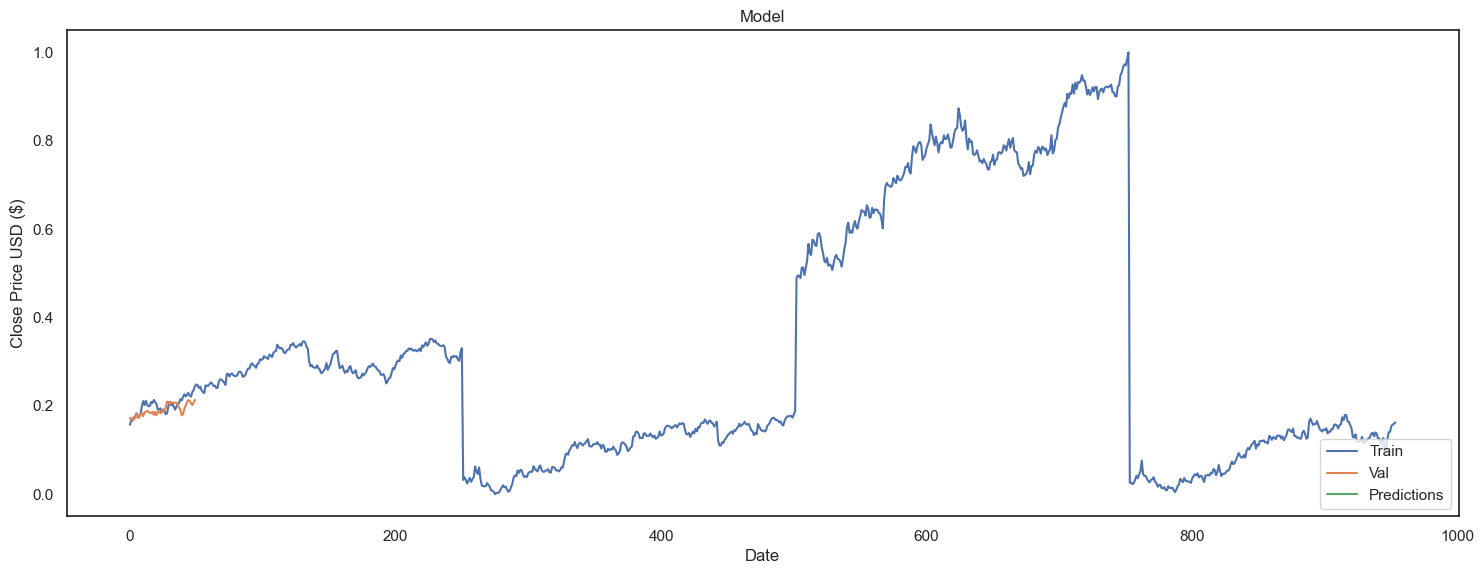

In [107]:
# 1. Separate the data into training and validation sets.
#    a. Create 'train' by selecting the data up to 'training_data_len'.
train = pd.DataFrame(scaled_data[:training_data_len, :], columns=['Close'])  # Assuming the date is the first column

#    b. Create 'valid' by selecting the data from 'training_data_len' to the end.
valid = pd.DataFrame(scaled_data[training_data_len:, :], columns=['Close'])  # Assuming the date is the first column

# 2. Add a new column 'Predictions' to 'valid' containing the predicted stock prices.
valid['Predictions'] = np.nan
valid.loc[60:, 'Predictions'] = predicted_prices[:, 0]

# 3. Visualize the data using plt.figure(figsize=(16,6)).
plt.figure(figsize=(16, 6))

#    a. Set the title to 'Model' using plt.title().
plt.title('Model')

#    b. Set the x-axis label to 'Date' and y-axis label to 'Close Price USD ($)' using plt.xlabel() and plt.ylabel().
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

#    c. Plot the 'Close' column of 'train'.
plt.plot(train['Close'], label='Train')

#    d. Plot both 'Close' and 'Predictions' columns of 'valid'.
plt.plot(valid['Close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')

#    e. Add a legend with labels 'Train', 'Val', and 'Predictions' in the lower right corner using plt.legend().
plt.legend(loc='lower right')

# 4. Display the plot using plt.show().
plt.show()


In [108]:
# Show the valid and predicted prices
valid
# run this cell after finifhing previous cells

Close  Predictions
0   0.172507          NaN
1   0.170471          NaN
2   0.165686          NaN
3   0.175255          NaN
4   0.172119          NaN
5   0.182497          NaN
6   0.174092          NaN
7   0.172895          NaN
8   0.180493          NaN
9   0.183564          NaN
10  0.176355          NaN
11  0.185439          NaN
12  0.185536          NaN
13  0.188737          NaN
14  0.186474          NaN
15  0.184178          NaN
16  0.183435          NaN
17  0.186474          NaN
18  0.179393          NaN
19  0.185989          NaN
20  0.178359          NaN
21  0.185989          NaN
22  0.187734          NaN
23  0.182788          NaN
24  0.187928          NaN
25  0.192325          NaN
26  0.187734          NaN
27  0.195978          NaN
28  0.209233          NaN
29  0.208328          NaN
30  0.202929          NaN
31  0.208490          NaN
32  0.207132          NaN
33  0.207099          NaN
34  0.206873          NaN
35  0.207002          NaN
36  0.202347          NaN
37  0.195849          NaN
38  0.191129          NaN
39  0.178521          NaN
40  0.180687          NaN
41  0.193166          NaN
42  0.200504          NaN
43  0.208134          NaN
44  0.212822          NaN
45  0.211011          NaN
46  0.206291          NaN
47  0.201604          NaN
48  0.207390          NaN
49  0.213339          NaN

Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.